In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ml project/gene disease/toddler/Toddler Autism dataset July 2018 - Toddler Autism dataset July 2018.csv - Toddler Autism dataset July 2018.csv')
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,2.333333,3,f,middle eastern,yes,no,No
1,2,1,1,0,0,0,1,1,0,0,0,3.000000,4,m,White European,yes,no,Yes
2,3,1,0,0,0,0,0,1,1,0,1,3.000000,4,m,middle eastern,yes,no,Yes
3,4,1,1,1,1,1,1,1,1,1,1,2.000000,10,m,Hispanic,no,no,Yes
4,5,1,1,0,1,1,1,1,1,1,1,1.666667,9,f,White European,no,yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,1850,0,1,0,0,0,0,0,0,1,1,16.597187,9,m,Hispanic,no,no,No
1850,1851,0,1,1,0,0,1,0,1,1,1,20.703001,9,m,White-European,no,no,No
1851,1852,0,0,0,0,0,0,0,0,0,0,5.711481,5,m,South Asian,yes,no,No
1852,1853,0,0,0,0,0,0,0,0,0,0,16.414305,7,f,?,no,no,No


In [ ]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Class/ASD Traits'],
      dtype='object')

In [ ]:
from sklearn.utils import shuffle

df = shuffle(df)

In [ ]:
#print number of rows and columns in the dataset

print("Number of Rows:",df.shape[0])
print("Number of Features:",df.shape[1])

Number of Rows: 1854
Number of Features: 18


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1854 entries, 380 to 487
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Case_No              1854 non-null   int64  
 1   A1                   1854 non-null   int64  
 2   A2                   1854 non-null   int64  
 3   A3                   1854 non-null   int64  
 4   A4                   1854 non-null   int64  
 5   A5                   1854 non-null   int64  
 6   A6                   1854 non-null   int64  
 7   A7                   1854 non-null   int64  
 8   A8                   1854 non-null   int64  
 9   A9                   1854 non-null   int64  
 10  A10                  1854 non-null   int64  
 11  Age_Mons             1854 non-null   float64
 12  Qchat-10-Score       1854 non-null   int64  
 13  Sex                  1854 non-null   object 
 14  Ethnicity            1854 non-null   object 
 15  Jaundice             1854 non-null   objec

In [ ]:
df.isnull().sum()

Case_No                0
A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
Qchat-10-Score         0
Sex                    0
Ethnicity              0
Jaundice               0
Family_mem_with_ASD    0
Class/ASD Traits       0
dtype: int64

In [ ]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,927.500000,0.562028,0.483819,0.422330,0.470334,0.468716,0.459008,0.540992,0.480583,0.491909,0.599784,13.597282,5.990831
std,535.348018,0.496271,0.499873,0.494064,0.499254,0.499155,0.498451,0.498451,0.499758,0.500069,0.490074,16.809165,2.705239
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,464.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.333333,4.000000
50%,927.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,6.000000
75%,1390.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.320811,8.000000
max,1854.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,10.000000


In [ ]:
df['Age_Mons'].value_counts()

Age_Mons
3.000000     320
2.000000      70
1.000000      67
2.500000      67
2.333333      42
            ... 
25.519986      1
17.116422      1
69.537553      1
18.081187      1
23.734767      1
Name: count, Length: 825, dtype: int64

<Axes: ylabel='Age_Mons'>

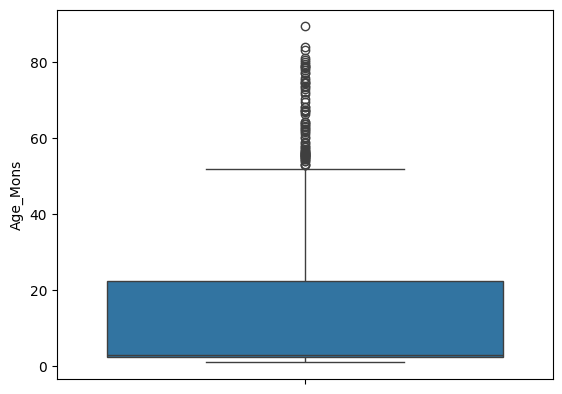

In [ ]:
sns.boxplot(df['Age_Mons'])

In [ ]:
df['Sex'].value_counts()

Sex
m    1265
f     589
Name: count, dtype: int64

In [ ]:
df['Ethnicity'] = df['Ethnicity'].replace('?', 'others')

In [ ]:
df['Ethnicity'].value_counts()

Ethnicity
White European    334
asian             299
White-European    257
others            206
middle eastern    188
Middle Eastern     97
Asian              67
Others             64
south asian        60
black              53
Hispanic           49
Black              47
Latino             43
South Asian        34
Pasifika           32
mixed               8
Pacifica            8
Turkish             5
Native Indian       3
Name: count, dtype: int64

In [ ]:
df['Jaundice'].value_counts()


Jaundice
no     1381
yes     473
Name: count, dtype: int64

In [ ]:
df['Class/ASD Traits'].value_counts()

Class/ASD Traits
No     965
Yes    889
Name: count, dtype: int64

In [ ]:
fig = px.histogram(df, x='Class/ASD Traits')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of Autistic and Non-Autistic Patients</b>', title_x=0.5)

# Show the plot
fig.show()

In [ ]:
fig = px.bar(df.groupby('Class/ASD Traits', as_index=False).agg({'Age_Mons':'mean'}),
             x='Class/ASD Traits',
             y='Age_Mons',
             color='Class/ASD Traits',
             title='Average Age of Autistic and Non-Autistic Patients')

# Update layout to center the title
fig.update_layout(title_text='<b>Average Age of Autistic and Non-Autistic Patients</b>', title_x=0.5)

# Show the plot
fig.show()

In [ ]:
fig = px.histogram(df, x='Sex')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of Males and Females </b>', title_x=0.5)

# Show the plot
fig.show()


In [ ]:
fig = px.bar(df.groupby(['Class/ASD Traits', 'Sex']).size().reset_index(name='count'),
             x='Class/ASD Traits',
             y='count',
             color='Sex',
             title='Count of Males and Females of Autistic and Non-Autistic Patients')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of Males and Females of Autistic and Non-Autistic Patients</b>', title_x=0.5)

# Show the plot
fig.show()

In [ ]:
fig = px.pie(df, names='Jaundice')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of People with Jaundice</b>', title_x=0.5)

# Show the plot
fig.show()

In [ ]:
X = df.drop('Class/ASD Traits', axis=1)
y = df['Class/ASD Traits']

In [ ]:
X.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
380,381,1,0,0,0,0,1,1,0,0,1,2.500000,4,m,Hispanic,no,no
1348,1349,0,0,0,0,0,0,0,0,0,0,24.869708,3,m,White-European,yes,no
405,406,0,0,1,1,1,1,1,1,1,0,3.000000,7,m,asian,no,no
1138,1139,1,1,1,1,1,1,1,1,1,1,11.936621,9,m,White-European,no,yes
1378,1379,1,1,1,1,1,1,1,1,1,1,53.944412,9,m,White-European,yes,yes


In [ ]:
cols_to_encode = ['Sex', 'Ethnicity', 'Jaundice','Family_mem_with_ASD']

# Apply label encoding to X
label_encoder_X = LabelEncoder()
for col in cols_to_encode:
    X[col] = label_encoder_X.fit_transform(X[col])

# Apply label encoding to y
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

In [ ]:
X.head(10)


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
380,381,1,0,0,0,0,1,1,0,0,1,2.500000,4,1,2,0,0
1348,1349,0,0,0,0,0,0,0,0,0,0,24.869708,3,1,12,1,0
405,406,0,0,1,1,1,1,1,1,1,0,3.000000,7,1,13,0,0
1138,1139,1,1,1,1,1,1,1,1,1,1,11.936621,9,1,12,0,1
1378,1379,1,1,1,1,1,1,1,1,1,1,53.944412,9,1,12,1,1
324,325,1,1,0,0,1,0,1,0,0,0,2.583333,4,1,11,1,0
751,752,1,0,1,1,1,1,1,1,1,0,3.000000,8,1,13,1,0
1735,1736,1,1,1,1,1,1,1,1,1,1,18.125611,9,0,12,0,1
24,25,1,1,1,1,1,1,1,1,1,0,1.833333,9,1,11,0,0
207,208,0,0,0,1,1,1,1,1,0,0,3.000000,5,1,11,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {y_test.shape}")

Shape of X_train is: (1483, 17)
Shape of Y_train is: (1483,)

Shape of X_test is: (371, 17)
Shape of Y_test is: (371,)


In [ ]:
model = Sequential([
        Dense(10, activation='relu', input_dim=X.shape[1]),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                180       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 277 (1.08 KB)
Trainable params: 277 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


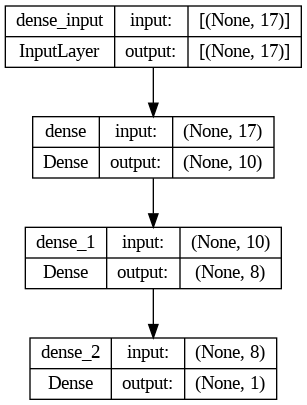

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=150, validation_split=0.25)

Epoch 1/150
35/35 [==============================] - 3s 11ms/step - loss: 0.8468 - accuracy: 0.5638 - val_loss: 0.5932 - val_accuracy: 0.6846
Epoch 2/150
35/35 [==============================] - 0s 5ms/step - loss: 0.6259 - accuracy: 0.6565 - val_loss: 0.6938 - val_accuracy: 0.5013
Epoch 3/150
35/35 [==============================] - 0s 5ms/step - loss: 0.6198 - accuracy: 0.6700 - val_loss: 0.5650 - val_accuracy: 0.7332
Epoch 4/150
35/35 [==============================] - 0s 5ms/step - loss: 0.5851 - accuracy: 0.7158 - val_loss: 0.5555 - val_accuracy: 0.7466
Epoch 5/150
35/35 [==============================] - 0s 5ms/step - loss: 0.5723 - accuracy: 0.7158 - val_loss: 0.6005 - val_accuracy: 0.6739
Epoch 6/150
35/35 [==============================] - 0s 5ms/step - loss: 0.5807 - accuracy: 0.7032 - val_loss: 0.6976 - val_accuracy: 0.6469
Epoch 7/150
35/35 [==============================] - 0s 5ms/step - loss: 0.5851 - accuracy: 0.6978 - val_loss: 0.5483 - val_accuracy: 0.7358
Epoch 8/150


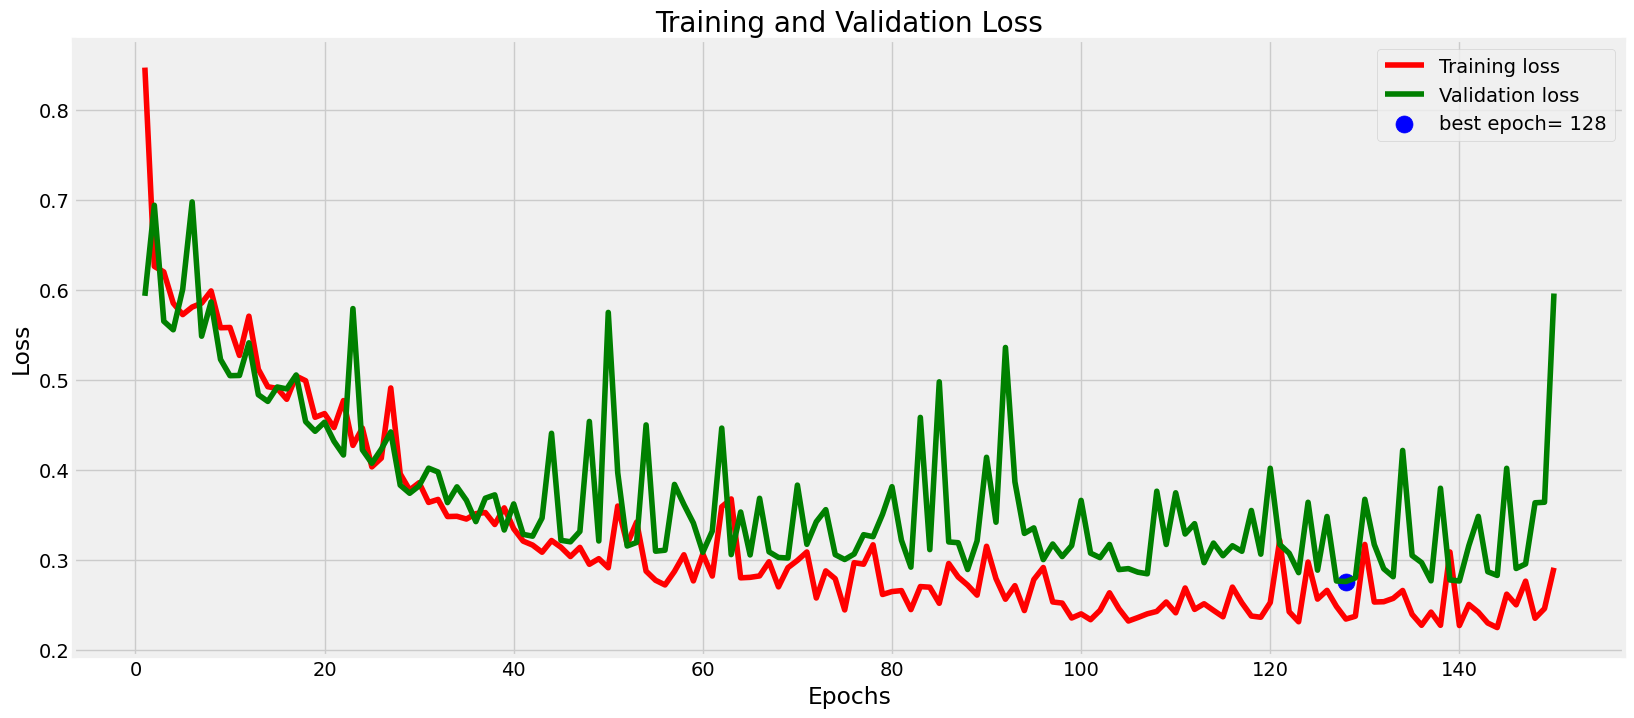

In [ ]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
acc = history.history['accuracy']

acc_loss_df = pd.DataFrame({"Accuracy" : acc,
                            "Loss" : tr_loss,
                            "Epoch" : Epochs})

acc_loss_df.style.bar(color = '#84A9AC',
                      subset = ['Accuracy','Loss'])

,Accuracy,Loss,Epoch
0,0.563849,0.846842,1
1,0.656475,0.625930,2
2,0.669964,0.619793,3
3,0.715827,0.585060,4
4,0.715827,0.572331,5
5,0.703237,0.580706,6
6,0.697842,0.585067,7
7,0.687050,0.598668,8
8,0.728417,0.557731,9
9,0.704137,0.558040,10


In [ ]:
y_pred = model.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[126,  58],
       [  4, 183]])

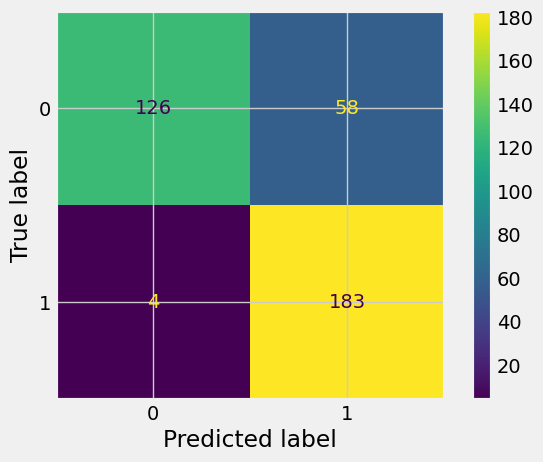

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.68      0.80       184
           1       0.76      0.98      0.86       187

    accuracy                           0.83       371
   macro avg       0.86      0.83      0.83       371
weighted avg       0.86      0.83      0.83       371



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    # Other parameters you want to tune...
}

# Create the base RandomForestClassifier
base_classifier = RandomForestClassifier(random_state=0)

# Create GridSearchCV object with the base classifier and parameter grid
grid_search = GridSearchCV(estimator=base_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter search on training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model found
best_model = grid_search.best_estimator_

# Evaluate the best model on test data
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy on Test Set: 0.9299191374663073


In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       184
           1       0.92      0.95      0.93       187

    accuracy                           0.93       371
   macro avg       0.93      0.93      0.93       371
weighted avg       0.93      0.93      0.93       371



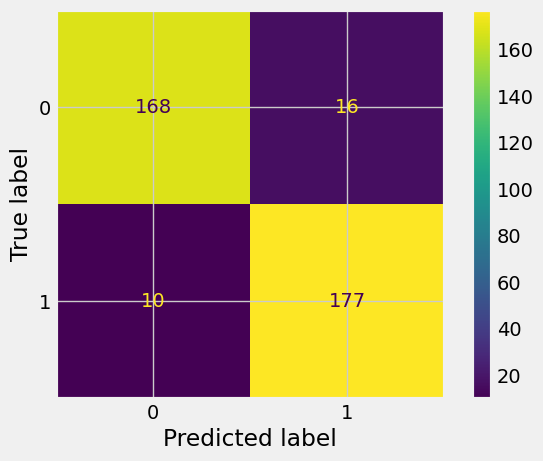

In [ ]:
cm2 = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm2)
disp.plot()
plt.show()

In [ ]:
from sklearn.svm import SVC

# SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Training the model
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       184
           1       0.85      0.92      0.88       187

    accuracy                           0.88       371
   macro avg       0.88      0.88      0.88       371
weighted avg       0.88      0.88      0.88       371



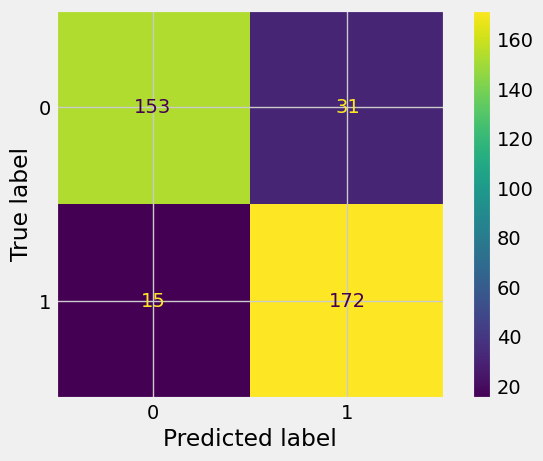

In [ ]:
cm3 = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm3)
disp.plot()
plt.show()